In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('omw-1.4')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

[nltk_data] Downloading package omw-1.4 to C:\Users\Fuzel
[nltk_data]     Shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
from nltk.corpus import stopwords
stop_words_norwegian = stopwords.words('norwegian')
stop_words_finnish = stopwords.words('finnish')
stop_words_swedish = stopwords.words('swedish')
stop_words_danish = stopwords.words('danish')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
stemmer_norwegian = SnowballStemmer("norwegian")
stemmer_finnish = SnowballStemmer("finnish")
stemmer_swedish = SnowballStemmer("swedish")
stemmer_danish = SnowballStemmer("danish")

import warnings
warnings.filterwarnings('ignore')

In [9]:
analyzer = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()

## Hjelp 113

In [16]:
hjelp_113_df = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\no\\hjlep_113_updated.csv')
hjelp_113_df.head()

,Review Id,User Name,Review,Rating,Date of Review,reviewCreatedVersion
0,7f567877-a1ae-4fe7-80e3-c5d82c0c39eb,N1NJASOAP,hope I don't get to use this app,4,2023-02-12 01:04:20,6.0.9
1,f61cb407-0ef5-4582-8d5b-541946830fee,Michael Forbes,I can't register it properly. When I have to a...,2,2022-09-26 16:56:41,6.0.7
2,d2475d1c-a0f9-4f9c-a5cc-768a16dc9046,Morale Kadiri,Am yet to use it,4,2022-04-16 16:19:29,5.0.12
3,7612ebee-0c46-4cdd-bdca-d0dcd4575b4d,Ole Anders Røsand,App tried without success. Not sure what happe...,1,2021-06-13 21:56:28,5.0.12
4,b341cd01-5659-4a5a-95f6-9602be711080,A Google user,Fine with dark mode but where do you switch ba...,5,2021-03-24 12:42:02,5.0.12


In [17]:
hjelp_113_sentiments = []
reviews = list(hjelp_113_df['Review'])
for sentence in reviews:
    vs = analyzer.polarity_scores(str(sentence))
    if vs["compound"] >= 0.05:
        hjelp_113_sentiments.append(1) 
    elif vs["compound"] <= -0.05:
        hjelp_113_sentiments.append(-1)
    else:
        hjelp_113_sentiments.append(0)

In [18]:
hjelp_113_df['Sentiment'] = hjelp_113_sentiments
hjelp_113_df.to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\no\\hjelp_113_sentiment.csv',index=False)

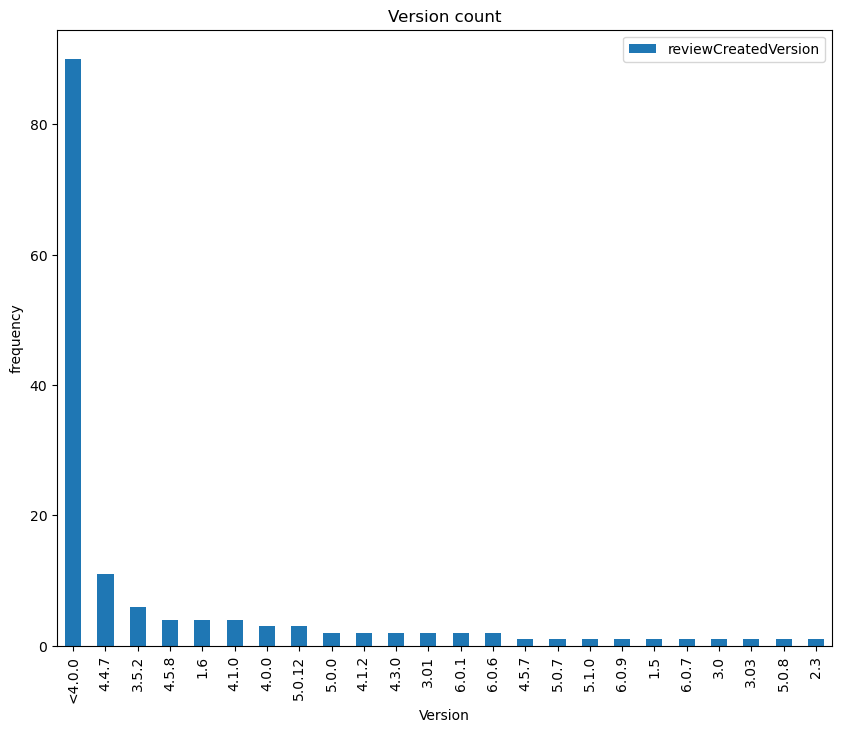

In [19]:
version_count_df = pd.DataFrame(hjelp_113_df['reviewCreatedVersion'].value_counts())
version_count_df.plot(kind='bar', title='Version count', ylabel='frequency',
         xlabel='Version', figsize=(10, 8))
plt.show()

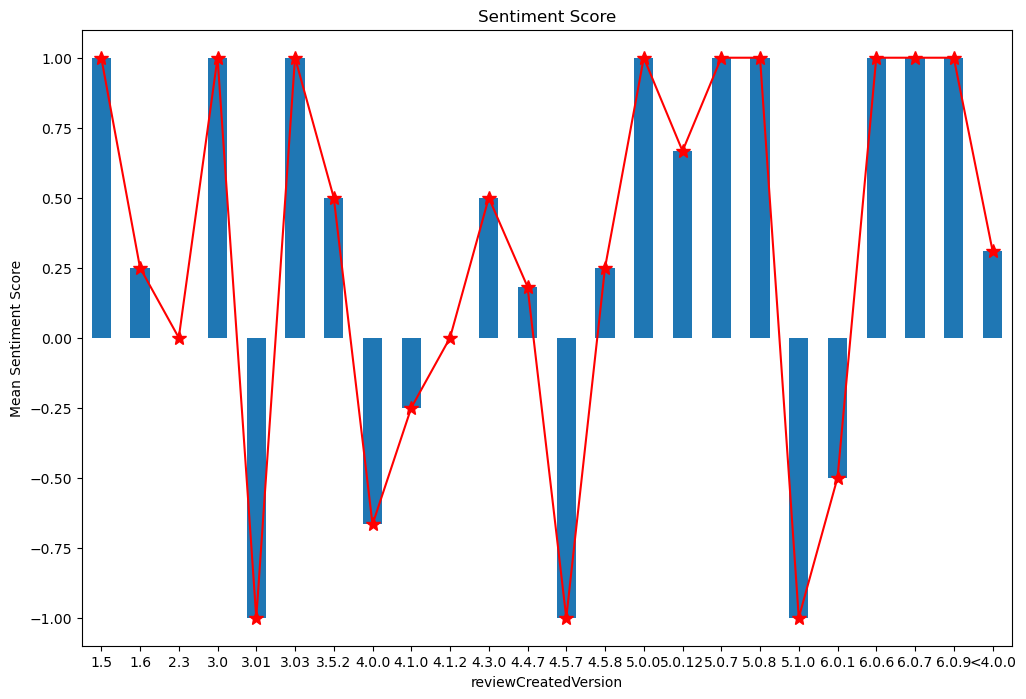

In [23]:
df = hjelp_113_df.groupby(['reviewCreatedVersion'])['Sentiment'].mean()
df.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Version', figsize=(12, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

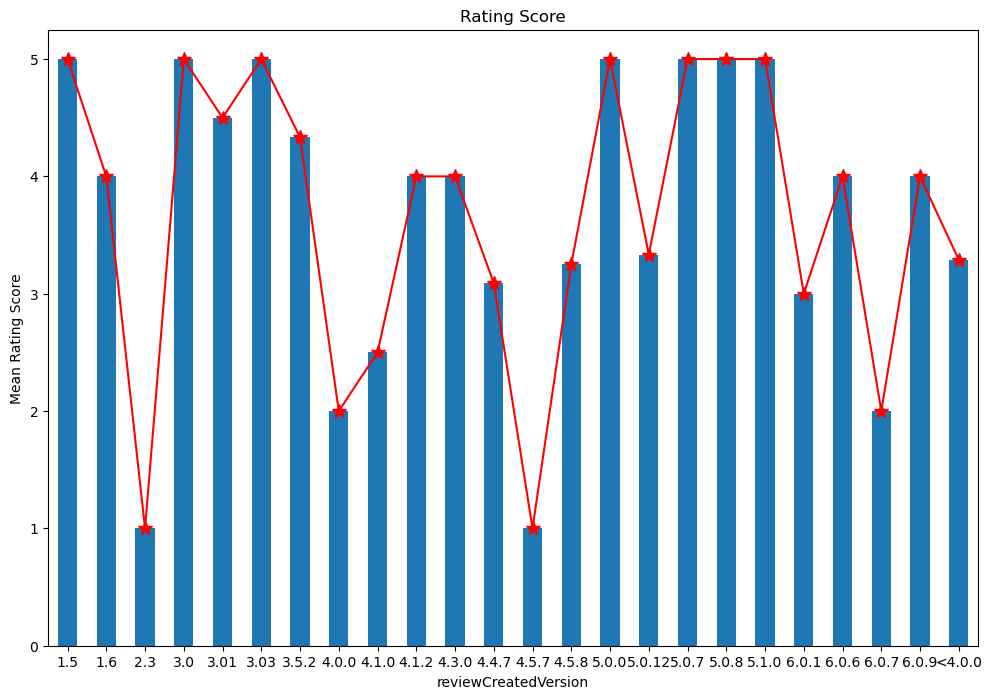

In [22]:
df = hjelp_113_df.groupby(['reviewCreatedVersion'])['Rating'].mean()
df.plot(kind='bar', title='Rating Score', ylabel='Mean Rating Score',
         xlabel='Version', figsize=(12, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

## Krisinformation app

In [4]:
kinfo_df = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\se\\krisinfo_se.csv')
kinfo_df.head()

,Review Id,User Name,Review,Rating,Date of Review,reviewCreatedVersion
0,6a8e22f2-c728-4738-aa4f-62ec044c6e90,skalmelid,Receive messages from all over Sweden even tho...,1,2021-06-18 15:25:13,2.6.0
1,b6fc4ca3-7f2f-4e15-8270-027dac13bf2d,Aleks,Sometimes works and sometimes doesn't. When a ...,3,2021-05-14 00:58:57,2.6.0
2,851cdff9-3a98-42b7-b1f0-1cb7128f4219,Rodrigo Flores,Is it too much to ask for an English version? ...,1,2020-12-07 14:20:34,2.6.0
3,c1a2dd5c-7d2e-443d-b3db-89a400f34f3c,Peter Liljenroth,The app does not provide reliable notification...,1,2020-12-03 18:52:15,2.6.0
4,ab15fcfd-8196-4d93-8cc3-751521446f3d,Andy Bones,Notifications are not working.,1,2020-11-06 09:32:36,2.6.0


In [5]:
kinfo_app_sentiments = []
reviews = list(kinfo_df['Review'])
for sentence in reviews:
    vs = analyzer.polarity_scores(str(sentence))
    if vs["compound"] >= 0.05:
        kinfo_app_sentiments.append(1) 
    elif vs["compound"] <= -0.05:
        kinfo_app_sentiments.append(-1)
    else:
        kinfo_app_sentiments.append(0)

In [15]:
kinfo_df['Sentiment'] = kinfo_app_sentiments
kinfo_df.to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\se\\kinfo_app_sentiment.csv',index=False)

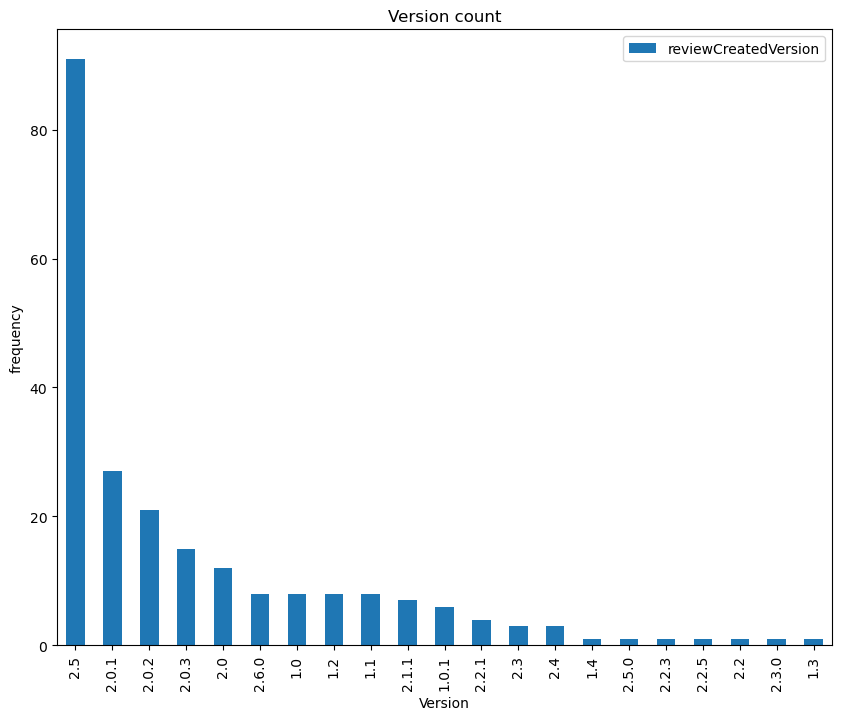

In [7]:
version_count_df = pd.DataFrame(kinfo_df['reviewCreatedVersion'].value_counts())
version_count_df.plot(kind='bar', title='Version count', ylabel='frequency',
         xlabel='Version', figsize=(10, 8))
plt.show()

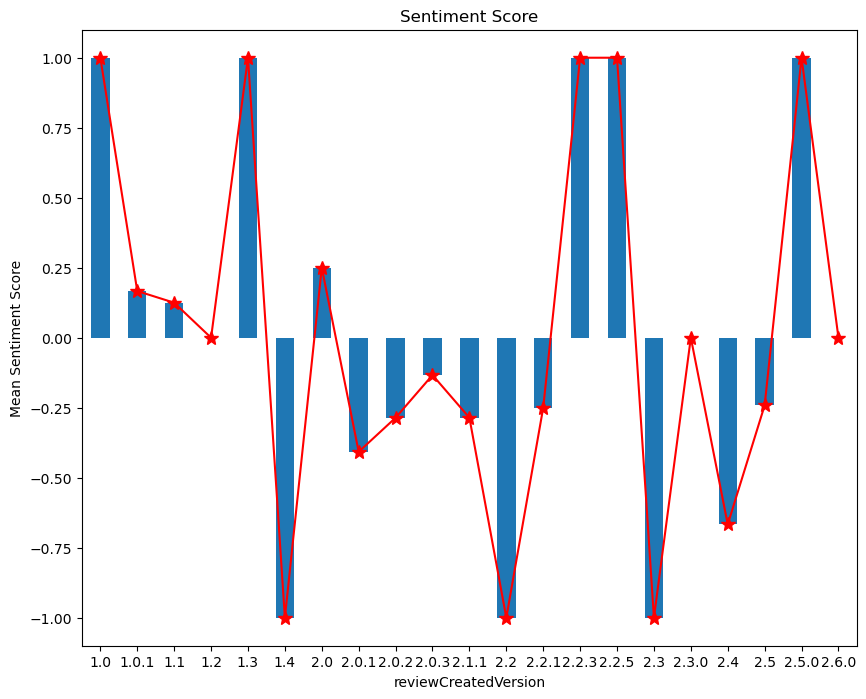

In [8]:
#kinfo_df['Sentiment'] = emergency_plus_play_store_sentiments
#emp_play_store_df['scaled_Sentiment'] = sc1.fit_transform(np.array(emp_play_store_df['Sentiment']).reshape(-1,1))
df = kinfo_df.groupby(['reviewCreatedVersion'])['Sentiment'].mean()
df.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Version', figsize=(10, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

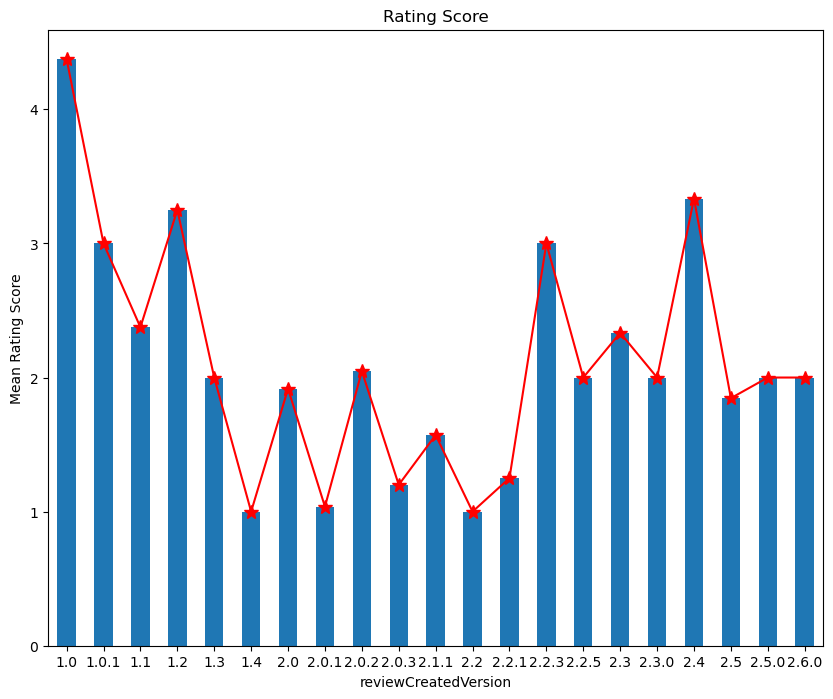

In [13]:
df = kinfo_df.groupby(['reviewCreatedVersion'])['Rating'].mean()
df.plot(kind='bar', title='Rating Score', ylabel='Mean Rating Score',
         xlabel='Version', figsize=(10, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

## Emergency Plus app

In [4]:
emp_play_store_df = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\Emergency plus play store.csv')
emp_apple_store_df = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\Emergency plus apple store.csv')

In [5]:
emergency_plus_play_store_sentiments = []
reviews = list(emp_play_store_df['Review'])
for sentence in reviews:
    vs = analyzer.polarity_scores(str(sentence))
    if vs["compound"] >= 0.05:
        emergency_plus_play_store_sentiments.append(1) 
    elif vs["compound"] <= -0.05:
        emergency_plus_play_store_sentiments.append(-1)
    else:
        emergency_plus_play_store_sentiments.append(0)

emergency_plus_apple_store_sentiments = []
reviews = list(emp_apple_store_df['Review'])
for sentence in reviews:
    vs = analyzer.polarity_scores(str(sentence))
    if vs["compound"] >= 0.05:
        emergency_plus_apple_store_sentiments.append(1) 
    elif vs["compound"] <= -0.05:
        emergency_plus_apple_store_sentiments.append(-1)
    else:
        emergency_plus_apple_store_sentiments.append(0)

In [6]:
emp_play_store_df['Sentiment'] = emergency_plus_play_store_sentiments
emp_play_store_df.to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\emergency_sentiment_play_store.csv')
emp_apple_store_df['Sentiment'] = emergency_plus_apple_store_sentiments
emp_apple_store_df.to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\emergency_sentiment_apple_store.csv')
pd.concat([emp_play_store_df,emp_apple_store_df]).to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\emergency_sentiment.csv')

## Sentiment and rating variablity by version

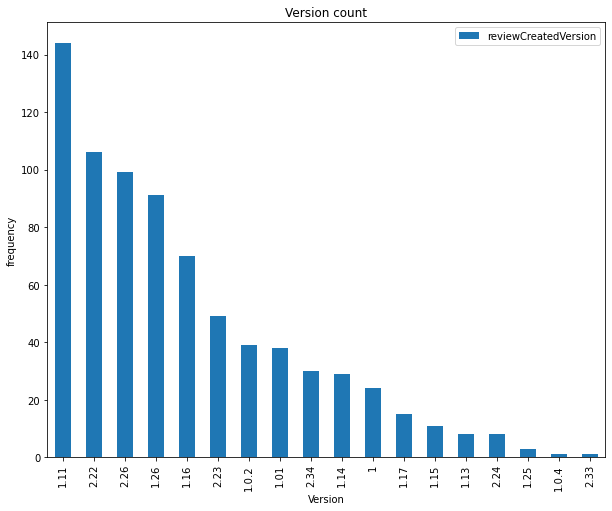

In [57]:
version_count_df = pd.DataFrame(emp_play_store_df['reviewCreatedVersion'].value_counts())
version_count_df.plot(kind='bar', title='Version count', ylabel='frequency',
         xlabel='Version', figsize=(10, 8))
plt.show()

Versions 1.04, 1.25, and 2.33 have a mean sentiment score of 1 but the count of each versions in the dataframe are 1,3, and 1 respectively.<br>
Versions 1.11, 2.22, 2.26, 1.26, and 1.16 have more values in the dataframe. And the mean sentiment score of each version is positive. <br>
This can be inferred as the users exhibit positive sentiment towards the emergency plus app.

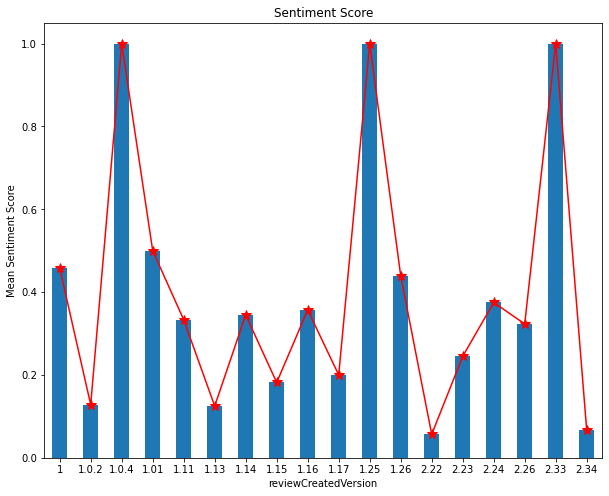

In [51]:
emp_play_store_df['Sentiment'] = emergency_plus_play_store_sentiments
#emp_play_store_df['scaled_Sentiment'] = sc1.fit_transform(np.array(emp_play_store_df['Sentiment']).reshape(-1,1))
df = emp_play_store_df.groupby(['reviewCreatedVersion'])['Sentiment'].mean()
df.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Version', figsize=(10, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

The ratings of emergency plus app has a constant score above 3 out of 5. It has seen a dip during version 2.22 but later on it roses to 3+ for the next versions. Currently the users rated the app for a 3+ score. We can consider that the users are satisfied with the app performance.

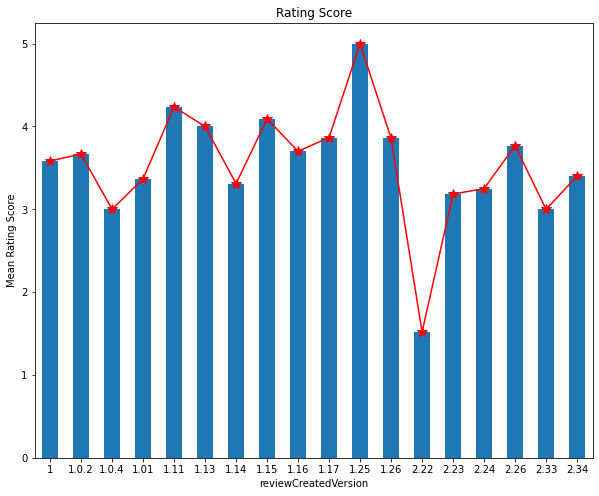

In [52]:
df = emp_play_store_df.groupby(['reviewCreatedVersion'])['Rating'].mean()
df.plot(kind='bar', title='Rating Score', ylabel='Mean Rating Score',
         xlabel='Version', figsize=(10, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

### 112 Suomi

In [9]:
suomi_play_store_df = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\112 Suomi play store fi.csv')
suomi_apple_store_df = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\112 Suomi apple store en.csv')

In [10]:
suomi_112_play_store_sentiments = []
reviews = list(suomi_play_store_df['Review'])
for sentence in reviews:
    vs = analyzer.polarity_scores(str(sentence))
    if vs["compound"] >= 0.05:
        suomi_112_play_store_sentiments.append(1) 
    elif vs["compound"] <= -0.05:
        suomi_112_play_store_sentiments.append(-1)
    else:
        suomi_112_play_store_sentiments.append(0)
        
suomi_112_apple_store_sentiments = []
reviews = list(suomi_apple_store_df['Review'])
for sentence in reviews:
    vs = analyzer.polarity_scores(str(sentence))
    if vs["compound"] >= 0.05:
        suomi_112_apple_store_sentiments.append(1) 
    elif vs["compound"] <= -0.05:
        suomi_112_apple_store_sentiments.append(-1)
    else:
        suomi_112_apple_store_sentiments.append(0)

In [11]:
suomi_play_store_df['Sentiment'] = suomi_112_play_store_sentiments
suomi_play_store_df.to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\suomi_sentiment_play_store.csv')
suomi_apple_store_df['Sentiment'] = suomi_112_apple_store_sentiments
suomi_apple_store_df.to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\suomi_sentiment_apple_store.csv')
pd.concat([suomi_play_store_df,suomi_apple_store_df]).to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\suomi_sentiment.csv')

### Sentiment and rating variablity by version

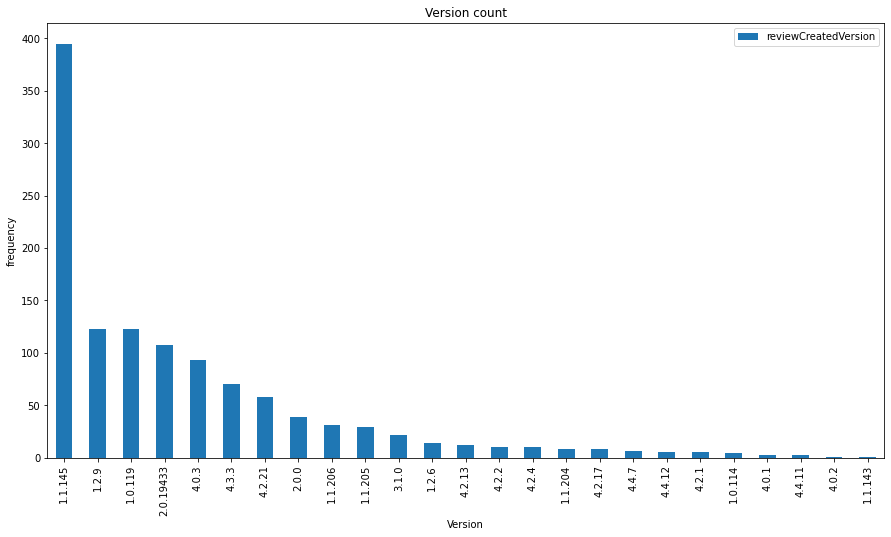

In [63]:
version_count_df = pd.DataFrame(suomi_play_store_df['reviewCreatedVersion'].value_counts())
version_count_df.plot(kind='bar', title='Version count', ylabel='frequency',
         xlabel='Version', figsize=(15, 8))
plt.show()

Versions 1.1.145, 1.2.9, 1.0.119, 2.0.19433, and 4.0.3 has more values in the dataframe and these versions exhibits mean positive sentiment according to the reviews. <br>
Versions 4.2.17, 4.4.11, and 4.4.12 shows negative sentiment. <br>
Current version 4.4.7, has neutral sentiment. 

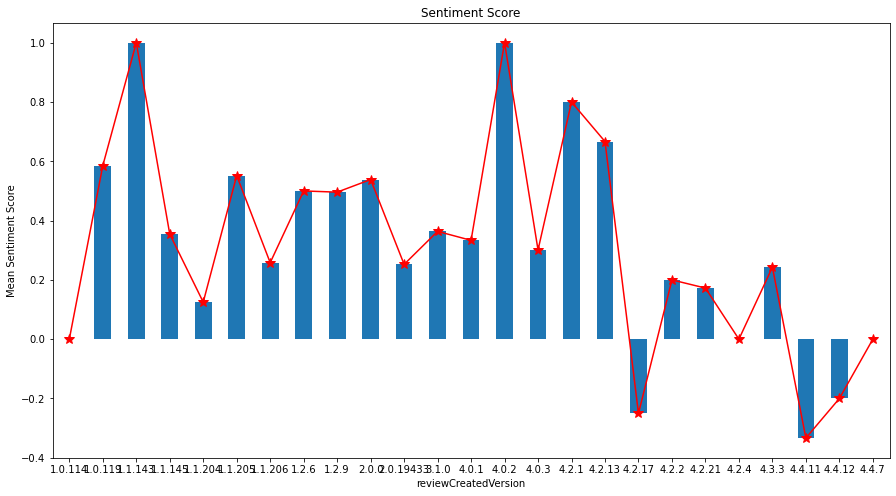

In [61]:
suomi_play_store_df['Sentiment'] = suomi_112_play_store_sentiments
suomi_apple_store_df.dropna(axis=0,inplace=True)
#suomi_play_store_df['scaled_Sentiment'] = sc2.fit_transform(np.array(suomi_play_store_df['Sentiment']).reshape(-1,1))
df = suomi_play_store_df.groupby(['reviewCreatedVersion'])['Sentiment'].mean()
df.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Version', figsize=(15, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

The above sentiments are completly matching with the average ratings on each version that mentioned above. <br>
But version 4.1.17 has good ratings i.e., nearly 3.5 eventhough it is classifed as exhibiting negative sentiments.

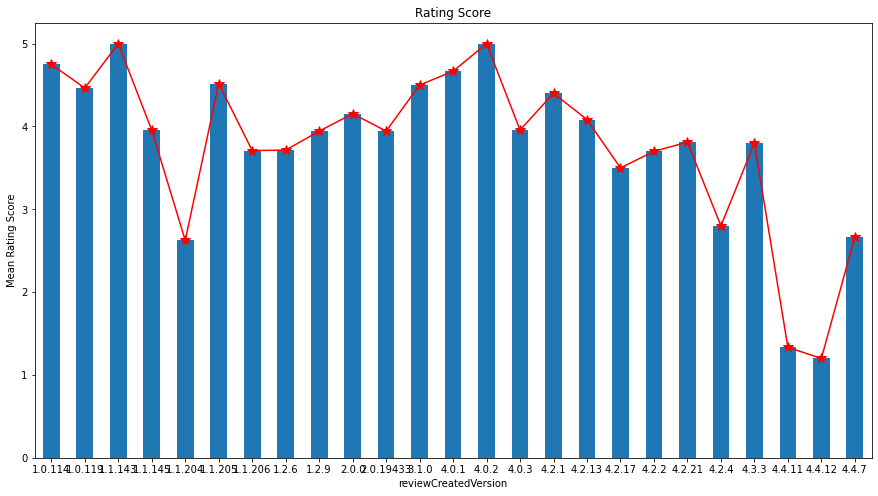

In [62]:
df = suomi_play_store_df.groupby(['reviewCreatedVersion'])['Rating'].mean()
df.plot(kind='bar', title='Rating Score', ylabel='Mean Rating Score',
         xlabel='Version', figsize=(15, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

### Emergency SOS

In [12]:
sos_play_store_df = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\SOS Alarm play store fi.csv')
sos_apple_store_df = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\SOS Alarm apple store en.csv')

In [13]:
sos_alarm_play_store_sentiments = []
reviews = list(sos_play_store_df['Review'])
for sentence in reviews:
    vs = analyzer.polarity_scores(str(sentence))
    if vs["compound"] >= 0.05:
        sos_alarm_play_store_sentiments.append(1) 
    elif vs["compound"] <= -0.05:
        sos_alarm_play_store_sentiments.append(-1)
    else:
        sos_alarm_play_store_sentiments.append(0)
        
sos_alarm_apple_store_sentiments = []
reviews = list(sos_apple_store_df['Review'])
for sentence in reviews:
    vs = analyzer.polarity_scores(str(sentence))
    if vs["compound"] >= 0.05:
        sos_alarm_apple_store_sentiments.append(1) 
    elif vs["compound"] <= -0.05:
        sos_alarm_apple_store_sentiments.append(-1)
    else:
        sos_alarm_apple_store_sentiments.append(0)

In [14]:
sos_play_store_df['Sentiment'] = sos_alarm_play_store_sentiments
sos_play_store_df.to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\sos_sentiment_play_store.csv')
sos_apple_store_df['Sentiment'] = sos_alarm_apple_store_sentiments
sos_apple_store_df.to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\sos_sentiment_apple_store.csv')
pd.concat([sos_play_store_df,sos_apple_store_df]).to_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\sos_sentiment.csv')

### Sentiment and rating variablity by version

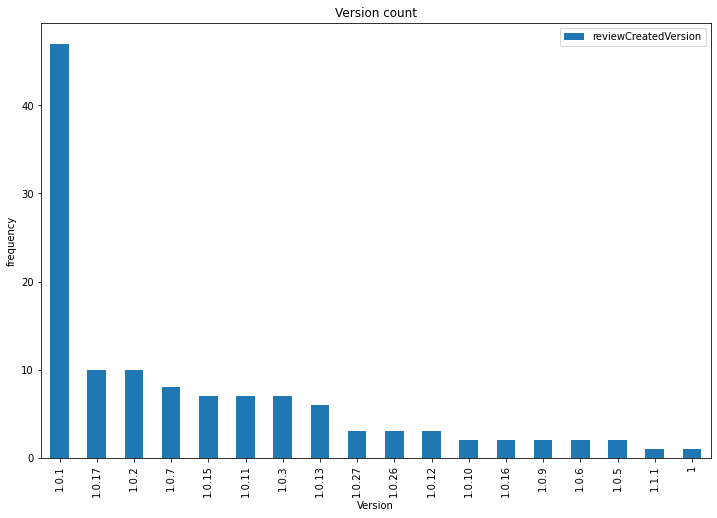

In [69]:
version_count_df = pd.DataFrame(sos_play_store_df['reviewCreatedVersion'].value_counts())
version_count_df.plot(kind='bar', title='Version count', ylabel='frequency',
         xlabel='Version', figsize=(12, 8))
plt.show()

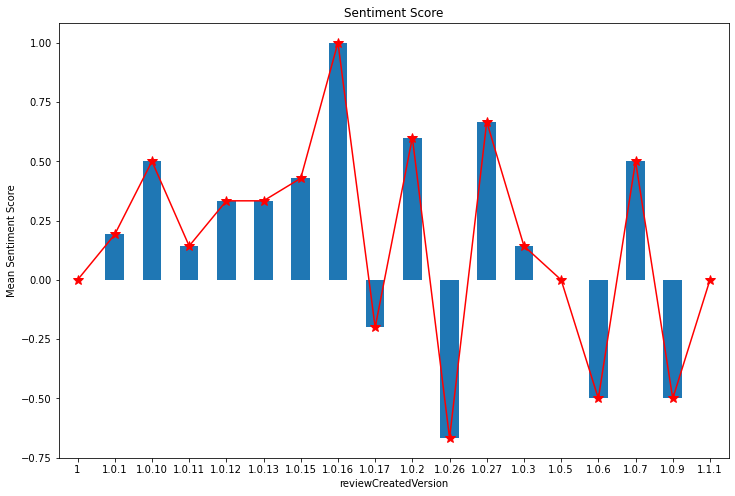

In [67]:
sos_play_store_df['Sentiment'] = sos_alarm_play_store_sentiments
#sos_play_store_df['scaled_Sentiment'] = sc3.fit_transform(np.array(sos_play_store_df['Sentiment']).reshape(-1,1))
df = sos_play_store_df.groupby(['reviewCreatedVersion'])['Sentiment'].mean()
df.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Version', figsize=(12, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

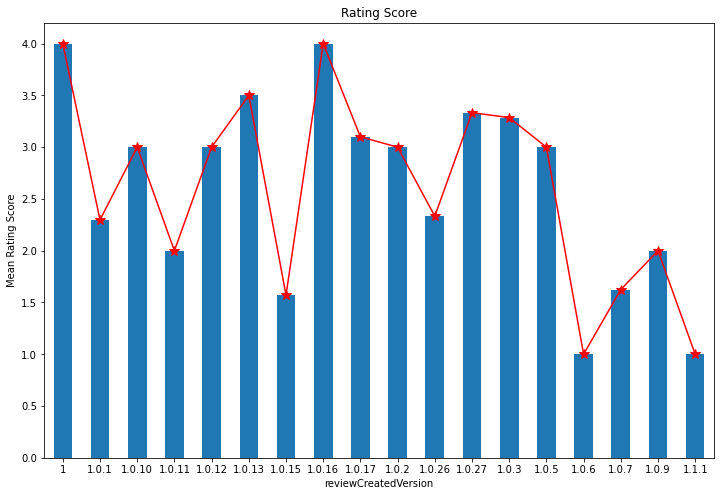

In [68]:
df = sos_play_store_df.groupby(['reviewCreatedVersion'])['Rating'].mean()
df.plot(kind='bar', title='Rating Score', ylabel='Mean Rating Score',
         xlabel='Version', figsize=(12, 8))
df.plot(kind='line', marker='*', color='red', ms=10)
plt.show()

## Zipf law 

In [13]:
import collections


def generate_zipf_table(text, top):

    """
    Create a list of dictionaries containing the top
    most frequent words, their frequencies and
    other Zipfian data.
    """

    text = _remove_punctuation(text)

    text = text.lower()

    top_word_frequencies = _top_word_frequencies(text, top)

    zipf_table = _create_zipf_table(top_word_frequencies)

    return zipf_table


def _remove_punctuation(text):

    """
    Removes the characters:
    !\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789
    from the text.
    """

    chars_to_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"

    tr = str.maketrans("", "", chars_to_remove)

    return text.translate(tr)


def _top_word_frequencies(text, top):

    """
    Create a list of tuples containing the most
    frequent words and their frequencies
    in descending order.
    """

    # With no argument, split() separates the string
    # by 1 or more consecutive instances of whitespace.
    words = text.split()

    # Create a collections.Counter instance from an
    # iterable, in this case our list of words.
    word_frequencies = collections.Counter(words)

    # most_common() gives us a list of tuples
    # containing words and their frequencies,
    # in descending order of frequency.
    top_word_frequencies = word_frequencies.most_common(top)

    return top_word_frequencies


def _create_zipf_table(frequencies):

    """
    Takes the list created by _top_word_frequencies
    and inserts it into a list of dictionaries,
    along with the Zipfian data.
    """

    zipf_table = []

    top_frequency = frequencies[0][1]

    for index, item in enumerate(frequencies, start=1):

        relative_frequency = "1/{}".format(index)
        zipf_frequency = top_frequency * (1 / index)
        difference_actual = item[1] - zipf_frequency
        difference_percent = (item[1] / zipf_frequency) * 100

        zipf_table.append({"word": item[0],
                           "actual_frequency": item[1],
                           "relative_frequency": relative_frequency,
                           "zipf_frequency": zipf_frequency,
                           "difference_actual": difference_actual,
                           "difference_percent": difference_percent})

    return zipf_table


def print_zipf_table(zipf_table):

    """
    Prints the list created by generate_zipf_table
    in table format with column headings.
    """

    width = 80

    print("-" * width)
    print("|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|")
    print("-" * width)

    format_string = "|{:4}|{:12}|{:12.0f}|{:>12}|{:12.2f}|{:12.2f}|{:7.2f}%|"

    for index, item in enumerate(zipf_table, start=1):

        print(format_string.format(index,
                                   item["word"],
                                   item["actual_frequency"],
                                   item["relative_frequency"],
                                   item["zipf_frequency"],
                                   item["difference_actual"],
                                   item["difference_percent"]))

    print("-" * width)

def pre_processing(series,stop_words,stemmer):
    series_list = list(series['Review'])
    text = ' '.join(series_list)
    text = _remove_punctuation(text)
    text = str(text).lower()
    text = ' '.join([w for w in text.split(' ') if w not in stop_words])
    text = ' '.join([stemmer.stem(w) for w in text.split(' ')])
    return text

## Finnish reviews frequency and word cloud

In [14]:
suomi = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\fi\\112 Suomi.csv')
suomi.head()

,Review Id,User Name,Review,Rating,Date of Review,reviewCreatedVersion
0,d9b83f81-4bec-446c-aec3-9c6e01a8885b,Patrik Rådman,"""Physical activity"" permission? Why?!",2,2023-02-13 11:55:53,4.4.23
1,14fad9b7-d7f5-4686-9a5a-7dff41dda083,Leonardo Navarro Ortega,"Sadly, this application crashes often. One wou...",2,2023-02-11 14:14:12,4.4.23
2,fafc0abd-c072-4f0a-969b-fbcc2f9ed8ed,Jouko Tenhunen,Sovellus on alkanut piippaamaan ja herättämään...,3,2023-02-03 09:35:31,4.4.12
3,aa34cb13-8606-4d9e-b63f-f6b18fa81872,Eki Tee,Vanhemmalla versiolla kun soitti normaalisti p...,1,2023-01-26 14:47:17,4.4.12
4,9ef64c7a-ecf5-44ca-be2c-94b59132f5b3,Timo Virtanen,App is costantly requesting permission for loc...,2,2023-01-24 10:30:41,4.4.11


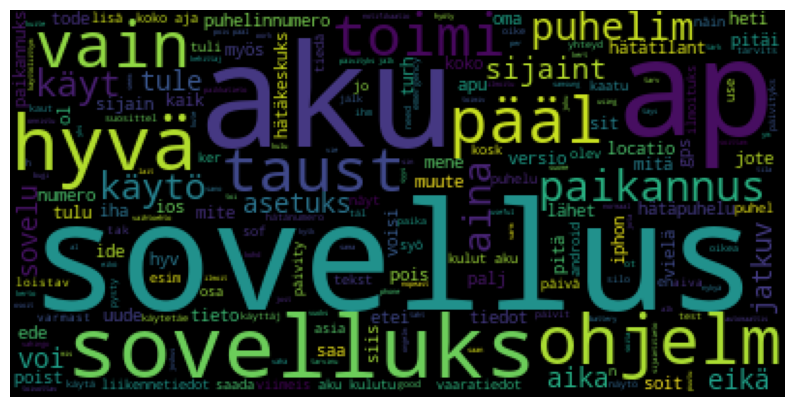

In [20]:
text = pre_processing(suomi,stop_words_finnish,stemmer_finnish)
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
print_zipf_table(generate_zipf_table(text,20))

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|aku         |          90|         1/1|       90.00|        0.00| 100.00%|
|   2|sovellus    |          78|         1/2|       45.00|       33.00| 173.33%|
|   3|ap          |          60|         1/3|       30.00|       30.00| 200.00%|
|   4|sovelluks   |          58|         1/4|       22.50|       35.50| 257.78%|
|   5|the         |          53|         1/5|       18.00|       35.00| 294.44%|
|   6|hyvä        |          46|         1/6|       15.00|       31.00| 306.67%|
|   7|pääl        |          44|         1/7|       12.86|       31.14| 342.22%|
|   8|ohjelm      |          43|         1/8|       11.25|       31.75| 382.22%|
|   9|to          |          39|         1/9|       10.00|       29.00| 390.00%|
|  10|vain        |         

## Swedish reviews frequency and word cloud

In [22]:
sos = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\se\\SOS Alarm.csv')
kinfo = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\se\\Krisinformation.se.csv')
swedish_df = pd.concat([sos,kinfo])
swedish_df.head()

,Review Id,User Name,Review,Rating,Date of Review,reviewCreatedVersion
0,6fc9faae-5dfa-4ebc-b1e0-2cb03b77eb85,Marco Vismara,It's a good app but why this app is not availa...,2,2023-02-15 14:58:36,1.2.0
1,2f2af60f-daaa-40ba-9848-9ed1bbceb5c5,David Björkevik,Says it doesn't work properly if it cannot log...,1,2023-01-14 23:58:55,1.1.1
2,d88c2844-6d87-4241-9561-8714415ea21e,Augustus the Roman Otter,The app and the concept in it of itself is goo...,3,2022-10-15 15:30:31,1.0.16
3,df03dd06-c7ac-4e2f-9de2-3423da820a05,Kathrine Spang,Appen fungerar inte alltid sådär toppen men nä...,4,2022-10-10 09:10:59,1.0.27
4,2fcb05c6-e546-45fc-ac01-fea983acc381,JOHN.YOK. KOK.CHOY.,Human rights is important or not?,5,2022-10-07 19:21:48,1.0.27


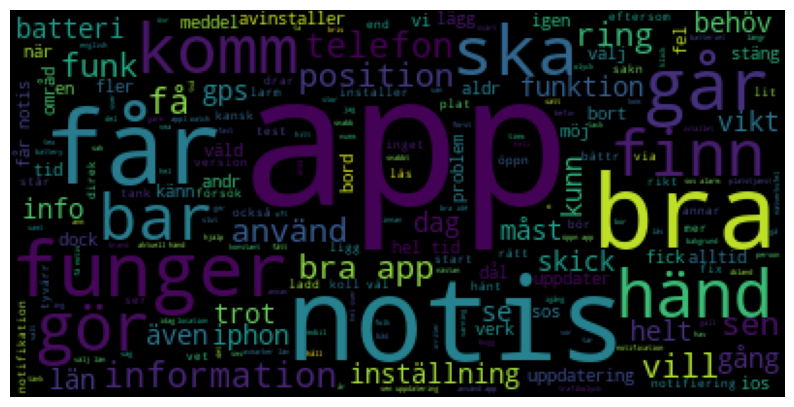

In [23]:
text = pre_processing(swedish_df,stop_words_swedish,stemmer_swedish)
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
print_zipf_table(generate_zipf_table(text,20))

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|app         |         659|         1/1|      659.00|        0.00| 100.00%|
|   2|notis       |         191|         1/2|      329.50|     -138.50|  57.97%|
|   3|bra         |         178|         1/3|      219.67|      -41.67|  81.03%|
|   4|får         |         150|         1/4|      164.75|      -14.75|  91.05%|
|   5|funger      |         107|         1/5|      131.80|      -24.80|  81.18%|
|   6|in          |          94|         1/6|      109.83|      -15.83|  85.58%|
|   7|går         |          94|         1/7|       94.14|       -0.14|  99.85%|
|   8|händ        |          88|         1/8|       82.38|        5.62| 106.83%|
|   9|län         |          80|         1/9|       73.22|        6.78| 109.26%|
|  10|ska         |         

## Norwegian reviews frequency and word cloud

In [25]:
hjelp = pd.read_csv('C:\\Users\\Fuzel Shaik\\Documents\\Master Thesis\\Data_extraction\\Dump\\no\\Hjelp 113.csv')
hjelp.head()

,Review Id,User Name,Review,Rating,Date of Review,reviewCreatedVersion
0,7f567877-a1ae-4fe7-80e3-c5d82c0c39eb,N1NJASOAP,håper jeg ikke får bruk for denne appen,4,2023-02-12 01:04:20,6.0.9
1,f61cb407-0ef5-4582-8d5b-541946830fee,Michael Forbes,Jeg får ikke registrert den ordentlig. Når jeg...,2,2022-09-26 16:56:41,6.0.7
2,d2475d1c-a0f9-4f9c-a5cc-768a16dc9046,Morale Kadiri,Am yet to use it,4,2022-04-16 16:19:29,5.0.12
3,7612ebee-0c46-4cdd-bdca-d0dcd4575b4d,Ole Anders Røsand,App forsøkt uten hell. Usikker på hva som skje...,1,2021-06-13 21:56:28,5.0.12
4,b341cd01-5659-4a5a-95f6-9602be711080,A Google user,Fint med dark mode men hvor bytter man tilbake...,5,2021-03-24 12:42:02,5.0.12


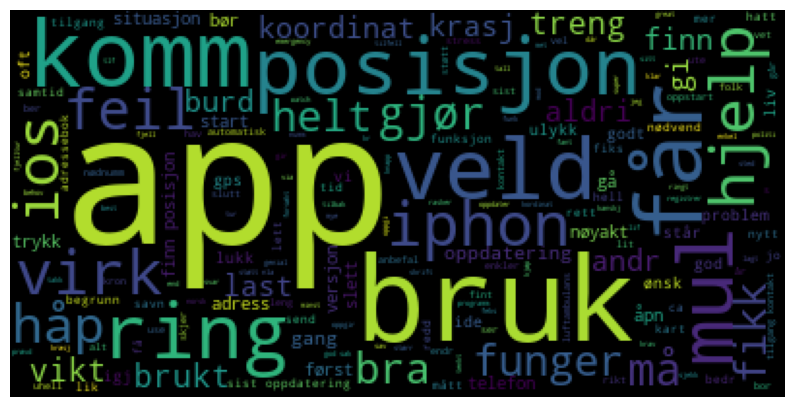

In [26]:
text = pre_processing(hjelp,stop_words_norwegian,stemmer_norwegian)
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
print_zipf_table(generate_zipf_table(text,20))

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|app         |         118|         1/1|      118.00|        0.00| 100.00%|
|   2|bruk        |          31|         1/2|       59.00|      -28.00|  52.54%|
|   3|posisjon    |          21|         1/3|       39.33|      -18.33|  53.39%|
|   4|komm        |          19|         1/4|       29.50|      -10.50|  64.41%|
|   5|får         |          18|         1/5|       23.60|       -5.60|  76.27%|
|   6|veld        |          16|         1/6|       19.67|       -3.67|  81.36%|
|   7|finn        |          15|         1/7|       16.86|       -1.86|  88.98%|
|   8|oppdatering |          14|         1/8|       14.75|       -0.75|  94.92%|
|   9|ring        |          13|         1/9|       13.11|       -0.11|  99.15%|
|  10|mul         |         

### Emergency plus word cloud and zipf table

In [23]:
emp_df = pd.concat([emp_play_store_df,emp_apple_store_df])
emp_df_pos_senti = emp_df[emp_df['Sentiment']==1]
emp_df_neg_senti = emp_df[emp_df['Sentiment']==-1]

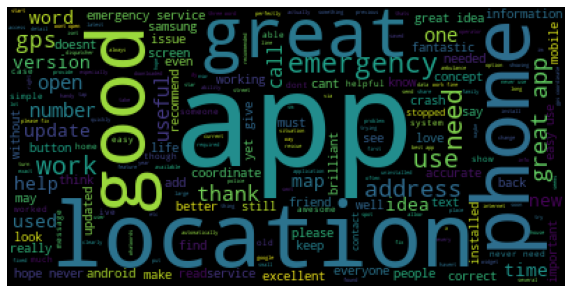

In [24]:
pos_text = pre_processing(emp_df_pos_senti)
wordcloud = WordCloud().generate(pos_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
print_zipf_table(generate_zipf_table(pos_text,20))

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|app         |         281|         1/1|      281.00|        0.00| 100.00%|
|   2|great       |         112|         1/2|      140.50|      -28.50|  79.72%|
|   3|location    |          91|         1/3|       93.67|       -2.67|  97.15%|
|   4|emergency   |          71|         1/4|       70.25|        0.75| 101.07%|
|   5|would       |          70|         1/5|       56.20|       13.80| 124.56%|
|   6|phone       |          69|         1/6|       46.83|       22.17| 147.33%|
|   7|good        |          68|         1/7|       40.14|       27.86| 169.40%|
|   8|use         |          64|         1/8|       35.12|       28.88| 182.21%|
|   9|need        |          59|         1/9|       31.22|       27.78| 188.97%|
|  10|work        |         

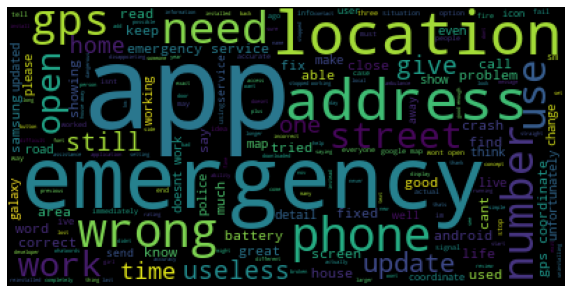

In [26]:
neg_text = pre_processing(emp_df_neg_senti)
wordcloud = WordCloud().generate(neg_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
print_zipf_table(generate_zipf_table(neg_text,20))

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|app         |         140|         1/1|      140.00|        0.00| 100.00%|
|   2|emergency   |          84|         1/2|       70.00|       14.00| 120.00%|
|   3|location    |          57|         1/3|       46.67|       10.33| 122.14%|
|   4|address     |          53|         1/4|       35.00|       18.00| 151.43%|
|   5|gps         |          41|         1/5|       28.00|       13.00| 146.43%|
|   6|wrong       |          35|         1/6|       23.33|       11.67| 150.00%|
|   7|phone       |          35|         1/7|       20.00|       15.00| 175.00%|
|   8|need        |          30|         1/8|       17.50|       12.50| 171.43%|
|   9|number      |          29|         1/9|       15.56|       13.44| 186.43%|
|  10|work        |         

### 112 Suomi word cloud and zipf table

In [28]:
suomi_df = pd.concat([suomi_play_store_df,suomi_apple_store_df])
suomi_df_pos_senti = suomi_df[suomi_df['Sentiment']==1]
suomi_df_neg_senti = suomi_df[suomi_df['Sentiment']==-1]

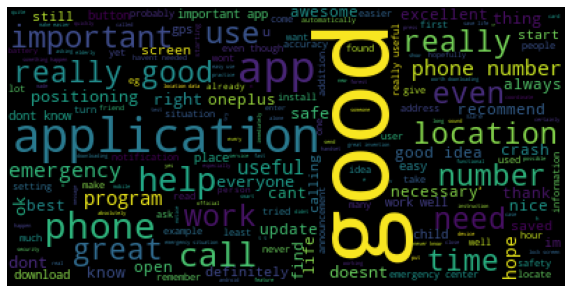

In [29]:
pos_text = pre_processing(suomi_df_pos_senti) 
wordcloud = WordCloud().generate(pos_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
print_zipf_table(generate_zipf_table(pos_text,20))

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|good        |         235|         1/1|      235.00|        0.00| 100.00%|
|   2|application |         102|         1/2|      117.50|      -15.50|  86.81%|
|   3|app         |          87|         1/3|       78.33|        8.67| 111.06%|
|   4|phone       |          86|         1/4|       58.75|       27.25| 146.38%|
|   5|really      |          78|         1/5|       47.00|       31.00| 165.96%|
|   6|number      |          67|         1/6|       39.17|       27.83| 171.06%|
|   7|important   |          51|         1/7|       33.57|       17.43| 151.91%|
|   8|call        |          48|         1/8|       29.38|       18.62| 163.40%|
|   9|use         |          47|         1/9|       26.11|       20.89| 180.00%|
|  10|help        |         

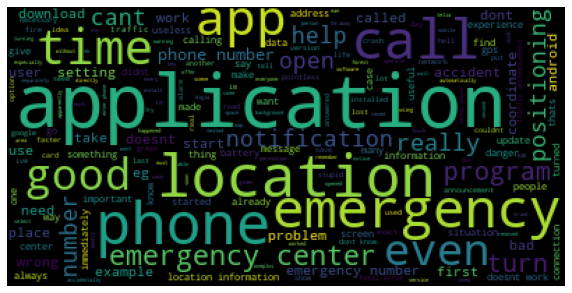

In [31]:
neg_text = pre_processing(suomi_df_neg_senti)
wordcloud = WordCloud().generate(neg_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
print_zipf_table(generate_zipf_table(neg_text,20))

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|emergency   |          88|         1/1|       88.00|        0.00| 100.00%|
|   2|application |          87|         1/2|       44.00|       43.00| 197.73%|
|   3|phone       |          72|         1/3|       29.33|       42.67| 245.45%|
|   4|location    |          61|         1/4|       22.00|       39.00| 277.27%|
|   5|number      |          50|         1/5|       17.60|       32.40| 284.09%|
|   6|call        |          48|         1/6|       14.67|       33.33| 327.27%|
|   7|time        |          37|         1/7|       12.57|       24.43| 294.32%|
|   8|app         |          34|         1/8|       11.00|       23.00| 309.09%|
|   9|center      |          32|         1/9|        9.78|       22.22| 327.27%|
|  10|even        |         

### SOS Alarm word cloud and zipf table

In [33]:
sos_df = pd.concat([sos_play_store_df,sos_apple_store_df])
sos_df_pos_senti = sos_df[sos_df['Sentiment']==1]
sos_df_neg_senti = sos_df[sos_df['Sentiment']==-1]

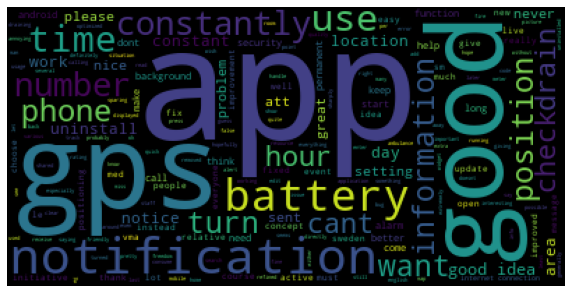

In [34]:
pos_text = pre_processing(sos_df_pos_senti) 
wordcloud = WordCloud().generate(pos_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:
print_zipf_table(generate_zipf_table(pos_text,20))

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|app         |          57|         1/1|       57.00|        0.00| 100.00%|
|   2|good        |          28|         1/2|       28.50|       -0.50|  98.25%|
|   3|gps         |          28|         1/3|       19.00|        9.00| 147.37%|
|   4|notification|          22|         1/4|       14.25|        7.75| 154.39%|
|   5|battery     |          16|         1/5|       11.40|        4.60| 140.35%|
|   6|use         |          12|         1/6|        9.50|        2.50| 126.32%|
|   7|time        |          11|         1/7|        8.14|        2.86| 135.09%|
|   8|constantly  |          10|         1/8|        7.12|        2.88| 140.35%|
|   9|number      |          10|         1/9|        6.33|        3.67| 157.89%|
|  10|would       |         

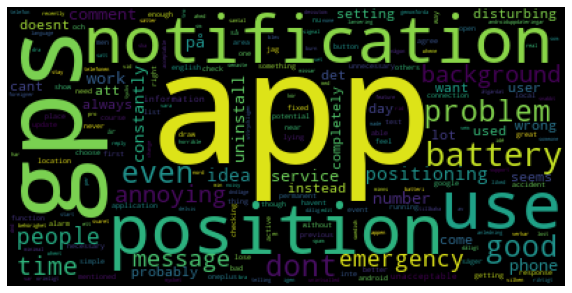

In [36]:
neg_text = pre_processing(sos_df_neg_senti)
wordcloud = WordCloud().generate(neg_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [37]:
print_zipf_table(generate_zipf_table(neg_text,20))

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|app         |          38|         1/1|       38.00|        0.00| 100.00%|
|   2|gps         |          15|         1/2|       19.00|       -4.00|  78.95%|
|   3|position    |          12|         1/3|       12.67|       -0.67|  94.74%|
|   4|use         |          11|         1/4|        9.50|        1.50| 115.79%|
|   5|notification|          11|         1/5|        7.60|        3.40| 144.74%|
|   6|battery     |           9|         1/6|        6.33|        2.67| 142.11%|
|   7|problem     |           7|         1/7|        5.43|        1.57| 128.95%|
|   8|even        |           7|         1/8|        4.75|        2.25| 147.37%|
|   9|good        |           7|         1/9|        4.22|        2.78| 165.79%|
|  10|dont        |         

### Emergency plus ratings across time 

In [38]:
df1 = pd.read_csv('C:\\Users\\fuzel\\Documents\\Master Thesis\\Data_extraction\\Dump\\Emergency plus play store release date.csv')
df2 = pd.read_csv('C:\\Users\\fuzel\\Documents\\Master Thesis\\Data_extraction\\Dump\\Emergency plus apple store release date.csv')

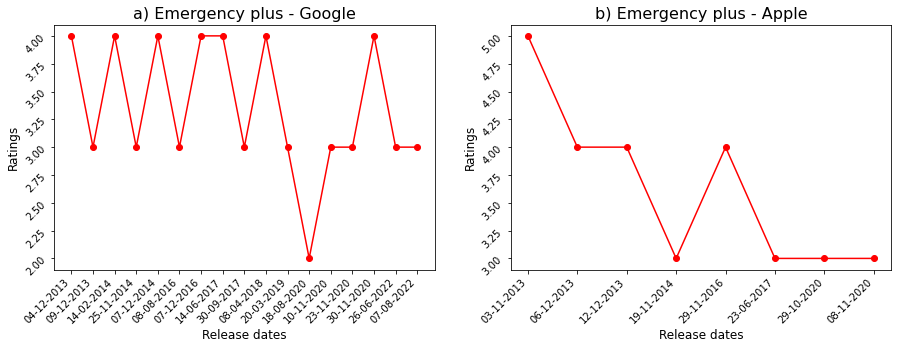

In [41]:
import matplotlib.pyplot as plt
from datetime import datetime

df_emergencyplus_google_versions = df1 
df_emergencyplus_apple_versions = df2

# dates= df_emergencyplus_google_versions['ReleaseDate'] ##jsut the string of dates??
# print(dates)

def indexingDateCol(df):
    df['Date of Review']=pd.to_datetime(df['Date of Review'])
    df = df.set_index(df['Date of Review'])
    df = df.sort_index(ascending=False)
    
    return df

def averageRatingPerReleasedate(df,version_df):
    average_rating_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
            
        else:
            df_new = df[dates[i]:dates[i-1]]
            
        average_rating_list.append(getAverageRating(df_new))

    return average_rating_list

def getAverageRating(df):
    mean = 0
    if(df.empty): #when particular range contains no values
        mean = 3 #assumption that average rating will be neural
    else:
        mean = round(df['Rating'].mean())
    return mean

fig, ax = plt.subplots(1,2, figsize=(15,5))

def plotRating1(df,rating_list, ax,col, ylabelName, color):  
    dates = df['ReleaseDate']
    dates = dates[::-1]#reversing
    
    #fig, ax = plt.subplots()
    ax[col].plot(dates, rating_list[::-1], **{'color': color, 'marker': 'o'})
    #plt.xticks(rotation = 45)
    ax[col].tick_params(labelrotation=45)
    ax[col].set_xlabel('Release dates', fontsize = 12) #for presentation purposes fontsize has increased
    ax[col].set_ylabel(ylabelName, fontsize = 12)
    #fig.autofmt_xdate()
    fig.autofmt_xdate(rotation=45)

def plotRating2(df,rating_list, ax, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]
    
    #fig, ax = plt.subplots()
    ax.plot(dates, rating_list[::-1])
    ax.set_xlabel('Release dates')
    ax.set_ylabel(ylabelName)
    fig.autofmt_xdate()

    
#Fig. 3 and Fig 5 obtained using this code segment

rating_list1 = averageRatingPerReleasedate(emp_play_store_df, df_emergencyplus_google_versions)
ax[0].set_title('a) Emergency plus - Google',fontsize = 16)
plotRating1(df_emergencyplus_google_versions, rating_list1,ax, 0, "Ratings", 'red')

# df_emergencyplus_google_versions['rating'] = rating_list1
# print(df_emergencyplus_google_versions)

rating_list2 = averageRatingPerReleasedate(emp_apple_store_df, df_emergencyplus_apple_versions)
ax[1].set_title('b) Emergency plus - Apple',fontsize = 16)
plotRating1(df_emergencyplus_apple_versions,rating_list2,ax, 1 , "Ratings", 'red')

### 112 Suomi ratings across time

In [42]:
df1 = pd.read_csv('C:\\Users\\fuzel\\Documents\\Master Thesis\\Data_extraction\\Dump\\112 Suomi play store release date.csv')
df2 = pd.read_csv('C:\\Users\\fuzel\\Documents\\Master Thesis\\Data_extraction\\Dump\\112 Suomi apple store release date.csv')

In [43]:
df1['ReleaseDate'] = pd.to_datetime(df1['ReleaseDate'])
df2['ReleaseDate'] = pd.to_datetime(df2['ReleaseDate'])

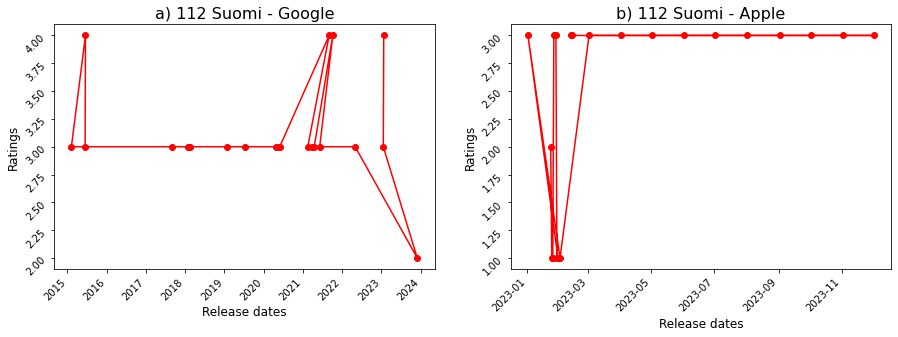

In [44]:
import matplotlib.pyplot as plt
from datetime import datetime

df_emergencyplus_google_versions = df1 
df_emergencyplus_apple_versions = df2

# dates= df_emergencyplus_google_versions['ReleaseDate'] ##jsut the string of dates??
# print(dates)

def indexingDateCol(df):
    df['Date of Review']=pd.to_datetime(df['Date of Review'])
    df = df.set_index(df['Date of Review'])
    df = df.sort_index(ascending=False)
    
    return df

def averageRatingPerReleasedate(df,version_df):
    average_rating_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
            
        else:
            df_new = df[dates[i]:dates[i-1]]
            
        average_rating_list.append(getAverageRating(df_new))

    return average_rating_list

def getAverageRating(df):
    mean = 0
    if(df.empty): #when particular range contains no values
        mean = 3 #assumption that average rating will be neural
    else:
        mean = round(df['Rating'].mean())
    return mean

fig, ax = plt.subplots(1,2, figsize=(15,5))

def plotRating1(df,rating_list, ax,col, ylabelName, color):  
    dates = df['ReleaseDate']
    dates = dates[::-1]#reversing
    
    #fig, ax = plt.subplots()
    ax[col].plot(dates, rating_list[::-1], **{'color': color, 'marker': 'o'})
    #plt.xticks(rotation = 45)
    ax[col].tick_params(labelrotation=45)
    ax[col].set_xlabel('Release dates', fontsize = 12) #for presentation purposes fontsize has increased
    ax[col].set_ylabel(ylabelName, fontsize = 12)
    #fig.autofmt_xdate()
    fig.autofmt_xdate(rotation=45)

def plotRating2(df,rating_list, ax, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]
    
    #fig, ax = plt.subplots()
    ax.plot(dates, rating_list[::-1])
    ax.set_xlabel('Release dates')
    ax.set_ylabel(ylabelName)
    fig.autofmt_xdate()

    
#Fig. 3 and Fig 5 obtained using this code segment

rating_list1 = averageRatingPerReleasedate(suomi_play_store_df, df_emergencyplus_google_versions)
ax[0].set_title('a) 112 Suomi - Google',fontsize = 16)
plotRating1(df_emergencyplus_google_versions, rating_list1,ax, 0, "Ratings", 'red')

# df_emergencyplus_google_versions['rating'] = rating_list1
# print(df_emergencyplus_google_versions)

rating_list2 = averageRatingPerReleasedate(suomi_apple_store_df, df_emergencyplus_apple_versions)
ax[1].set_title('b) 112 Suomi - Apple',fontsize = 16)
plotRating1(df_emergencyplus_apple_versions,rating_list2,ax, 1 , "Ratings", 'red')

### SOS Alarm ratings across time

In [45]:
df1 = pd.read_csv('C:\\Users\\fuzel\\Documents\\Master Thesis\\Data_extraction\\Dump\\SOS Alarm play store release date.csv')
df2 = pd.read_csv('C:\\Users\\fuzel\\Documents\\Master Thesis\\Data_extraction\\Dump\\SOS Alarm apple store release date.csv')

In [46]:
df1['ReleaseDate'] = pd.to_datetime(df1['ReleaseDate'])
df2['ReleaseDate'] = pd.to_datetime(df2['ReleaseDate'])

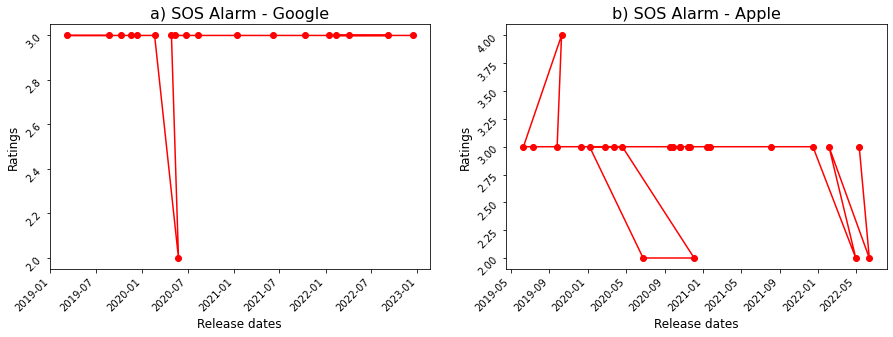

In [47]:
import matplotlib.pyplot as plt
from datetime import datetime

df_emergencyplus_google_versions = df1 
df_emergencyplus_apple_versions = df2

# dates= df_emergencyplus_google_versions['ReleaseDate'] ##jsut the string of dates??
# print(dates)

def indexingDateCol(df):
    df['Date of Review']=pd.to_datetime(df['Date of Review'])
    df = df.set_index(df['Date of Review'])
    df = df.sort_index(ascending=False)
    
    return df

def averageRatingPerReleasedate(df,version_df):
    average_rating_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
            
        else:
            df_new = df[dates[i]:dates[i-1]]
            
        average_rating_list.append(getAverageRating(df_new))

    return average_rating_list

def getAverageRating(df):
    mean = 0
    if(df.empty): #when particular range contains no values
        mean = 3 #assumption that average rating will be neural
    else:
        mean = round(df['Rating'].mean())
    return mean

fig, ax = plt.subplots(1,2, figsize=(15,5))

def plotRating1(df,rating_list, ax,col, ylabelName, color):  
    dates = df['ReleaseDate']
    dates = dates[::-1]#reversing
    
    #fig, ax = plt.subplots()
    ax[col].plot(dates, rating_list[::-1], **{'color': color, 'marker': 'o'})
    #plt.xticks(rotation = 45)
    ax[col].tick_params(labelrotation=45)
    ax[col].set_xlabel('Release dates', fontsize = 12) #for presentation purposes fontsize has increased
    ax[col].set_ylabel(ylabelName, fontsize = 12)
    #fig.autofmt_xdate()
    fig.autofmt_xdate(rotation=45)

def plotRating2(df,rating_list, ax, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]
    
    #fig, ax = plt.subplots()
    ax.plot(dates, rating_list[::-1])
    ax.set_xlabel('Release dates')
    ax.set_ylabel(ylabelName)
    fig.autofmt_xdate()

    
#Fig. 3 and Fig 5 obtained using this code segment

rating_list1 = averageRatingPerReleasedate(sos_play_store_df, df_emergencyplus_google_versions)
ax[0].set_title('a) SOS Alarm - Google',fontsize = 16)
plotRating1(df_emergencyplus_google_versions, rating_list1,ax, 0, "Ratings", 'red')

# df_emergencyplus_google_versions['rating'] = rating_list1
# print(df_emergencyplus_google_versions)

rating_list2 = averageRatingPerReleasedate(sos_apple_store_df, df_emergencyplus_apple_versions)
ax[1].set_title('b) SOS Alarm - Apple',fontsize = 16)
plotRating1(df_emergencyplus_apple_versions,rating_list2,ax, 1 , "Ratings", 'red')